In [66]:
"""
CNN 텐서플로  
각 이미지 3D 텐서로 표현 [높이, 너비, 채널]
미니 배치 4D 텐서로 표현 : [미니 배치 크리, 높이, 너비, 채널]
합성곱 층 편향 1D 텐서 : [편향]
"""
from sklearn.datasets import load_sample_image
import numpy as np

china = load_sample_image("china.jpg") / 255.0
flower = load_sample_image("flower.jpg") / 255.0
image = np.array([china, flower])
batch_size, height, width, channels = image.shape

In [67]:
"""
필터 : 7x7 필터 2개, 각각 수직, 수평 필터
"""
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

In [68]:
import tensorflow as tf

In [69]:
"""
tf.nn.conv2d : 저수준 API, 스트라이드=1, 패딩= SAME or VALID
SAME : 제로 패딩 적용해 스트라이드 크기에 맞춤
VALID : 패딩 적용 안 하고 스트라이드 하고 남은 것 짜름
"""
outputs = tf.nn.conv2d(image, filters, strides=1, padding="SAME")
"""
위는 필터를 직접 적용한 것
케라스 이용 예시
keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")
"""

'\n위는 필터를 직접 적용한 것\n케라스 이용 예시\nkeras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")\n'

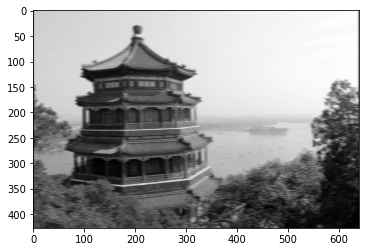

'china.jpg 에 수평 필터 적용'

In [70]:
import matplotlib.pyplot as plt
plt.imshow(outputs[0,:,:,1], cmap="gray")
plt.show()
"""china.jpg 에 수평 필터 적용"""

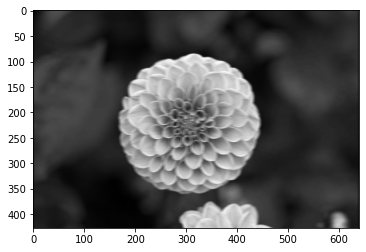

'flower.jpg에 수평 필터 적용'

In [71]:
plt.imshow(outputs[1,:,:,1], cmap="gray")
plt.show()
"""flower.jpg에 수평 필터 적용"""

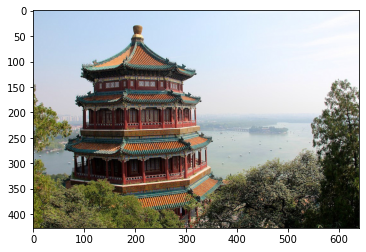

In [72]:
plt.imshow(china)
plt.show()

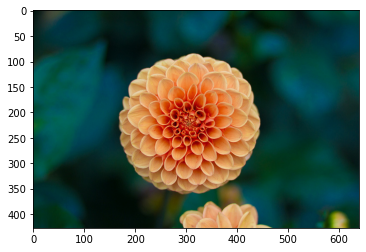

In [73]:
plt.imshow(flower)
plt.show()

In [74]:
# 풀링
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)
avg_pool = tf.keras.layers.AvgPool2D(pool_size=2)

In [75]:
output = tf.nn.max_pool(image, ksize=(1,1,1,3), strides=(1,1,1,3), padding="VALID")

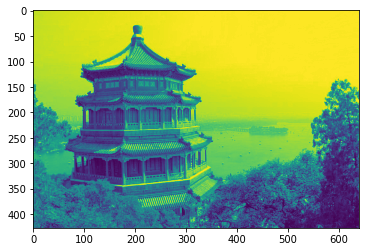

In [76]:
plt.imshow(output[0])

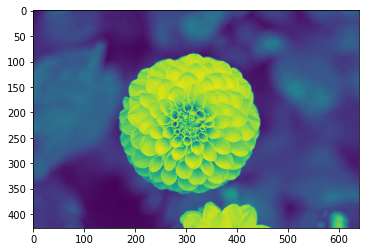

In [77]:
plt.imshow(output[1])

In [78]:
# 케라스 모델의 층으로 만들기
depth_pool = tf.keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1,1,1,3), strides=(1,1,1,3), padding="valid"))

In [95]:
"""
MNIST로 CNN 만들어서 테스트 해보기
검증 데이터는 test 데이터로 사용함.
"""

'\nMNIST로 CNN 만들어서 테스트 해보기\n검증 데이터는 test 데이터로 사용함.\n'

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28,28,1]), # 필터 64개, 7X7, 스트라이드=1(default)
    tf.keras.layers.MaxPooling2D(2), # 풀링 크기 2
    tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [80]:
mnist = tf.keras.datasets.mnist

In [81]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

In [82]:
x_train, x_test = x_train/255, x_test/255

In [83]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [85]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [89]:
history = model.fit(x_train, t_train, validation_data=(x_test, t_test))

1875/1875 [==============================] - 557s 297ms/step - loss: 0.1043 - accuracy: 0.9754 - val_loss: 0.0740 - val_accuracy: 0.9826


In [90]:
score = model.evaluate(x_test, t_test, verbose=0)
print("Test loss = ", score[0])
print("Test accuracy = ", score[1])

Test loss =  0.07403670251369476
Test accuracy =  0.9825999736785889
